Dataset 1 loaded in 15.11 seconds
non constant column at  (array([0]),)
non constant column at  (array([0]),)
non constant column at  (array([0, 1, 2, 3, 4, 5, 6, 7]),)


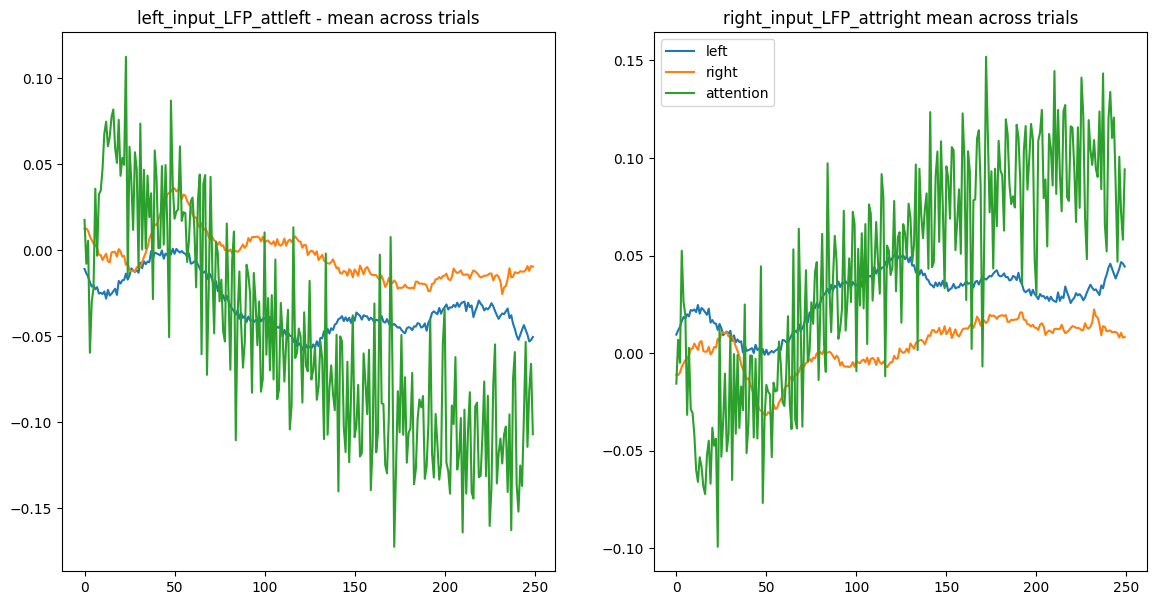

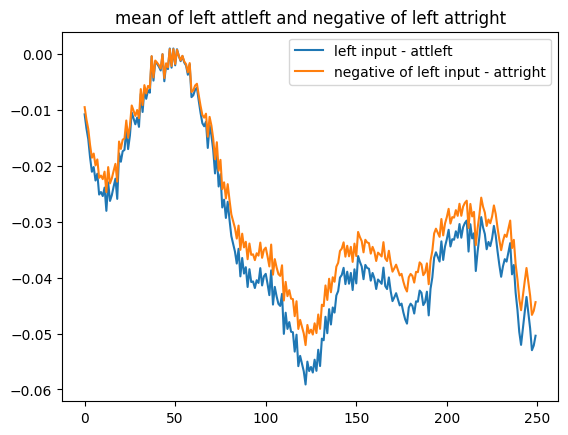

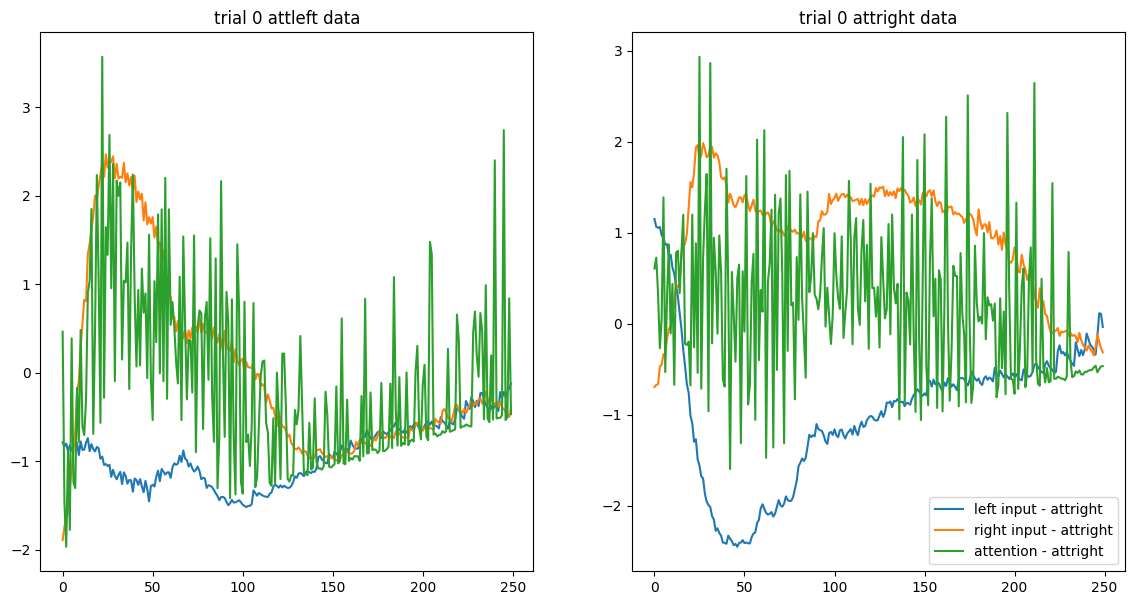

NaNs in left_attleft_coherence: False


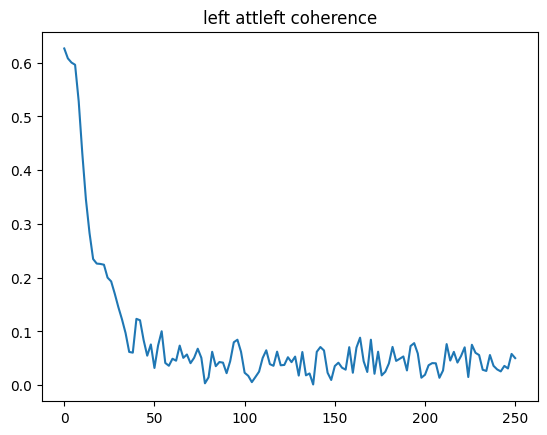

Dataset 1 complete in 17.846121072769165
Dataset 2 loaded in 7.42 seconds
non constant column at  (array([0]),)
non constant column at  (array([0]),)
non constant column at  (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),)


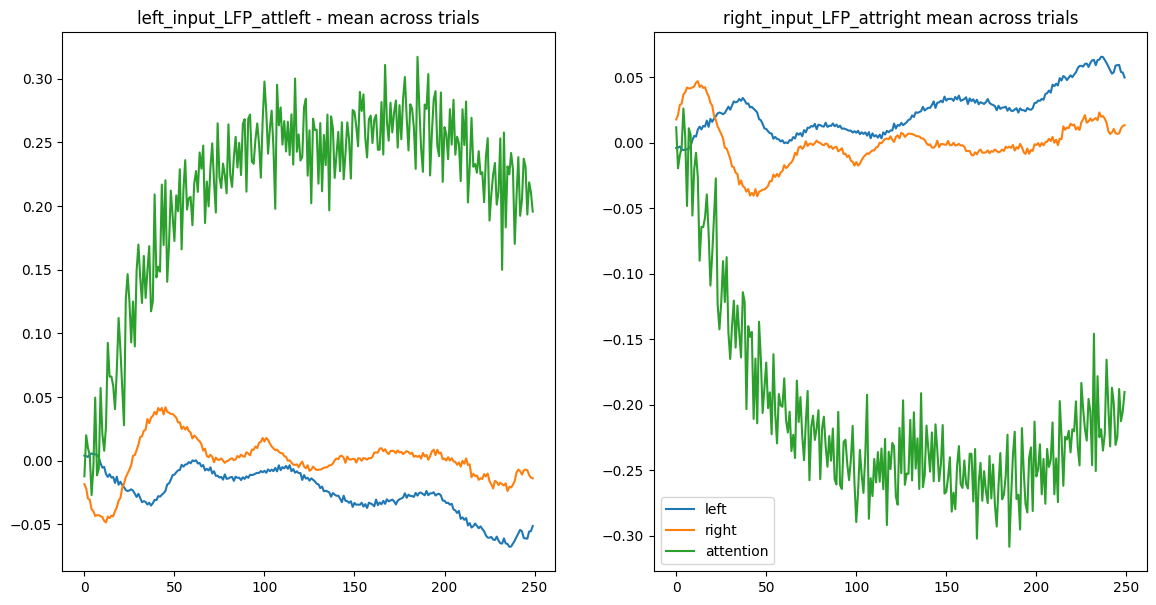

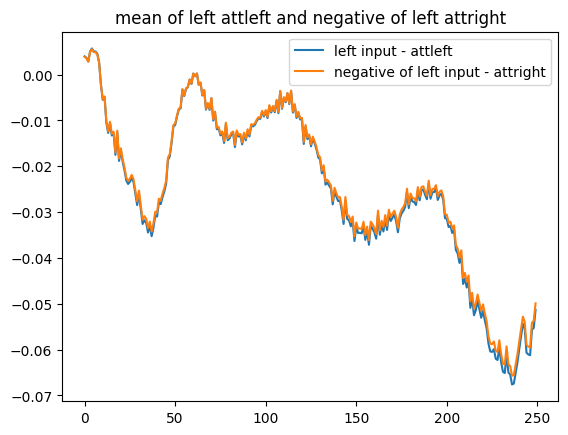

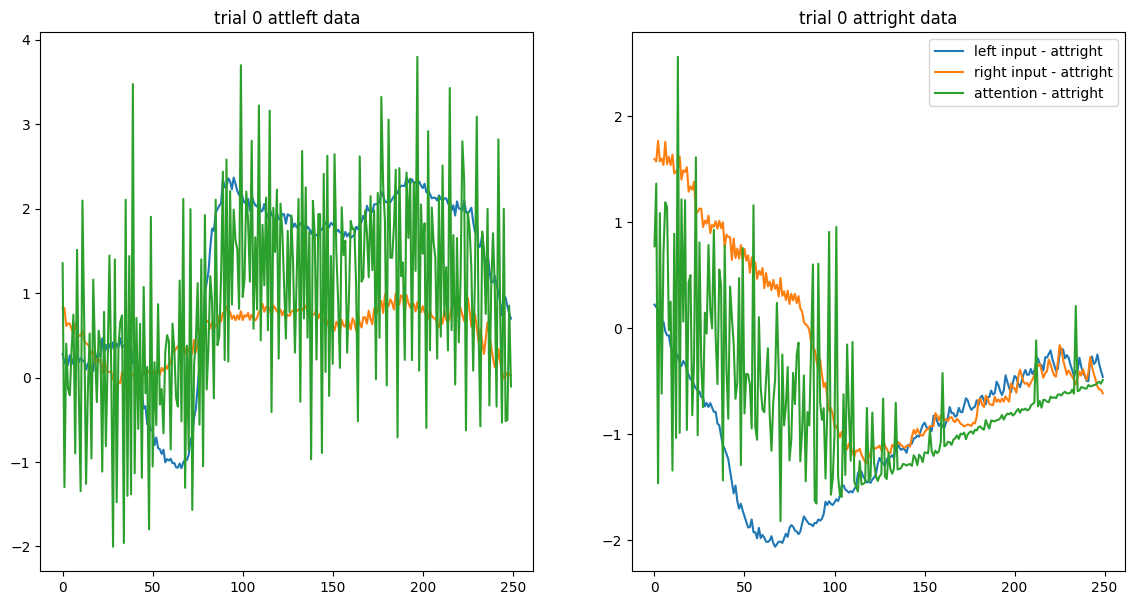

NaNs in left_attleft_coherence: False


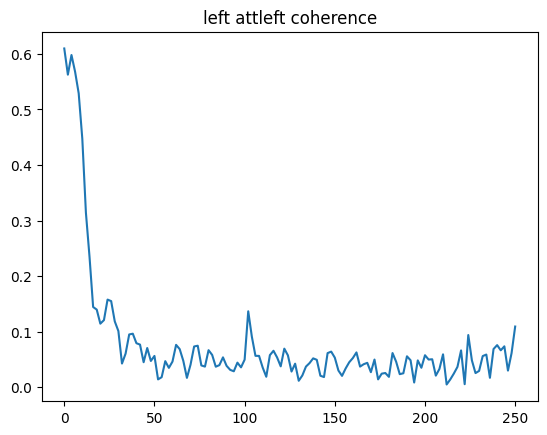

Dataset 2 complete in 10.185704708099365
Dataset 4 loaded in 5.80 seconds
non constant column at  (array([0]),)
non constant column at  (array([0]),)
non constant column at  (array([0, 1, 2, 3, 4, 5, 6, 7, 8]),)


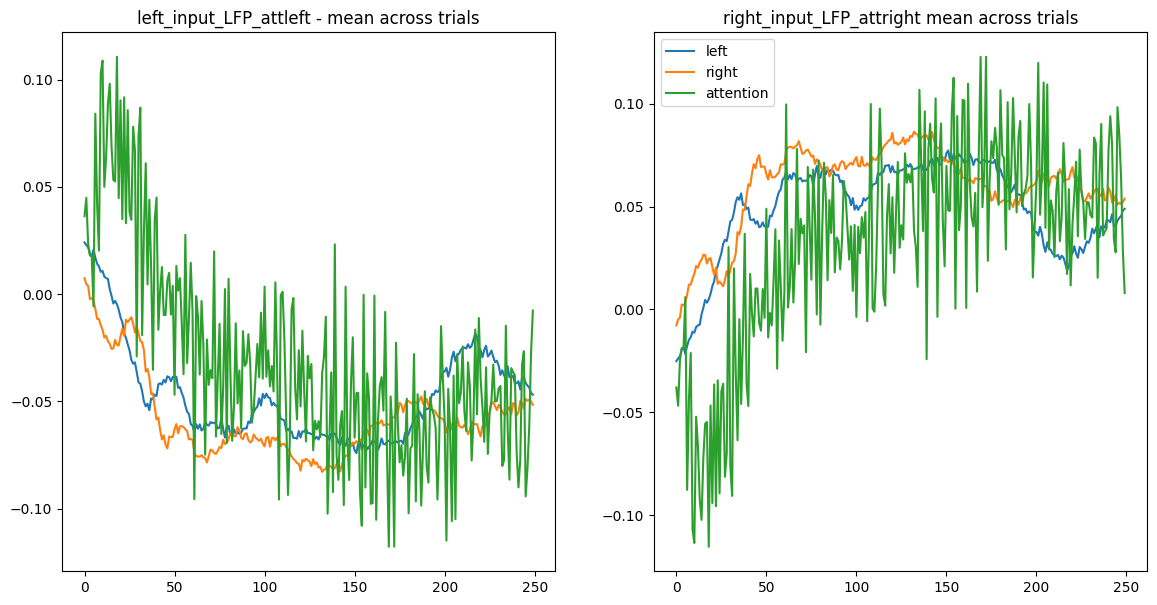

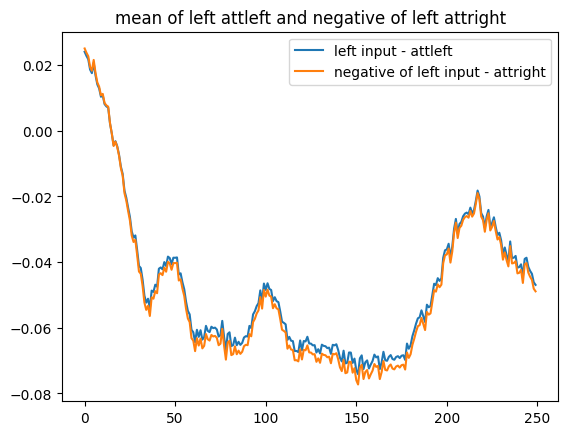

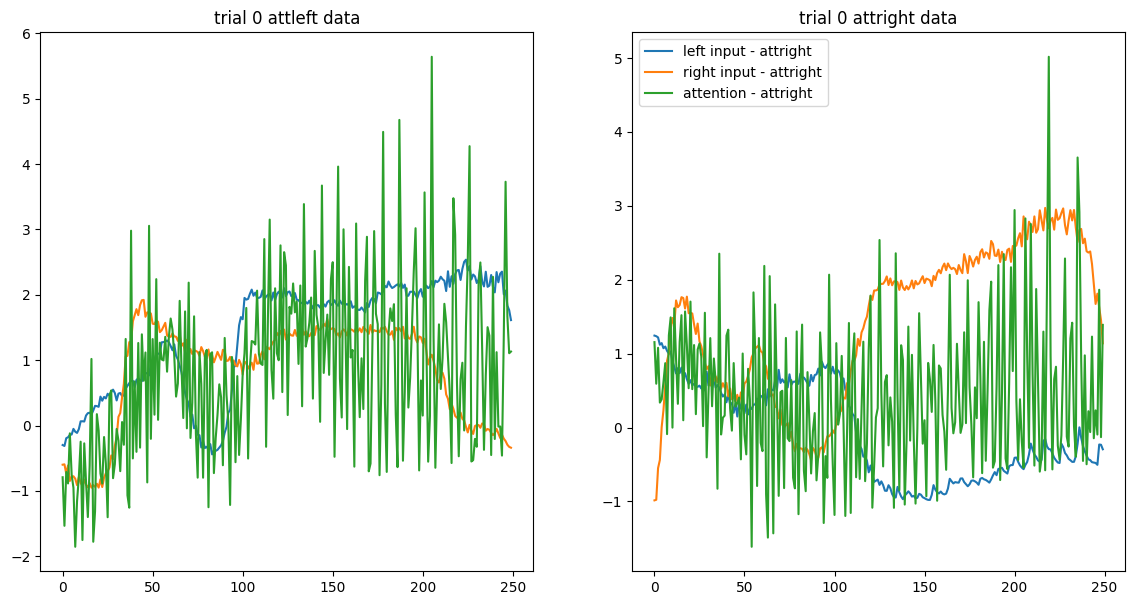

NaNs in left_attleft_coherence: False


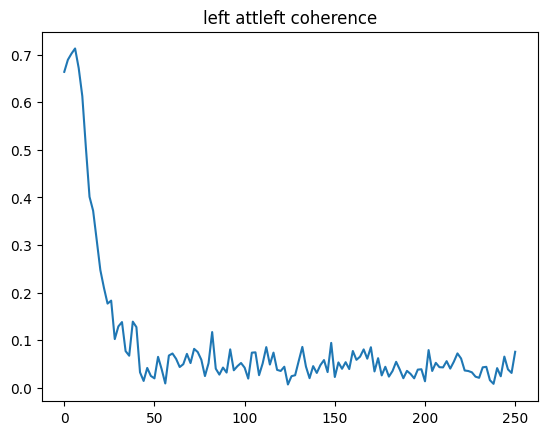

Dataset 4 complete in 8.05981707572937
Dataset 8 loaded in 7.99 seconds
non constant column at  (array([0]),)
non constant column at  (array([0]),)
non constant column at  (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),)


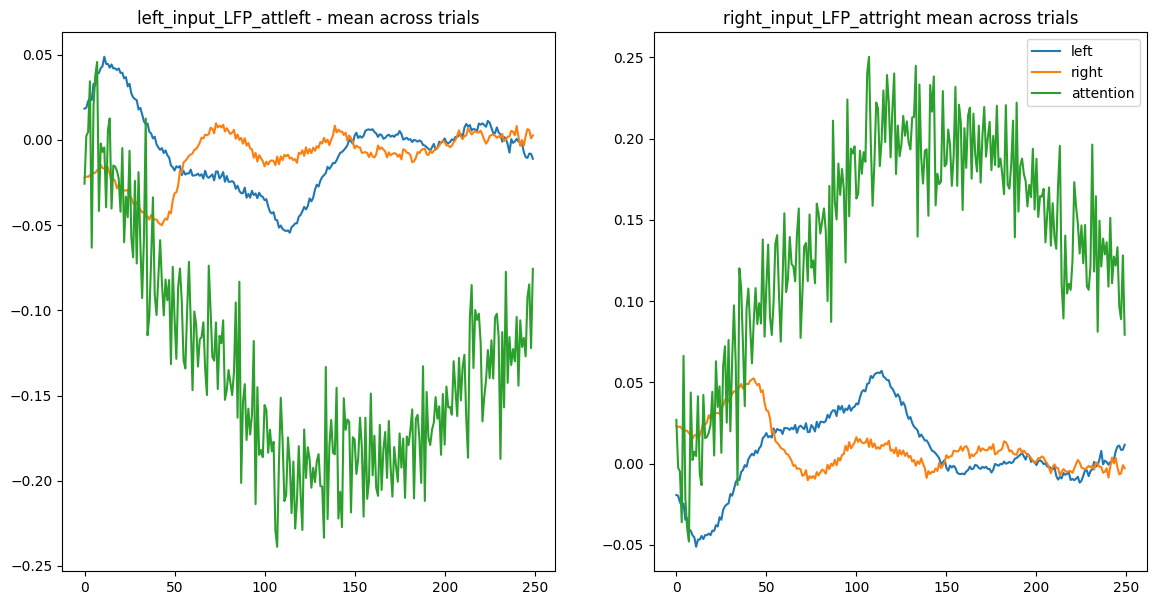

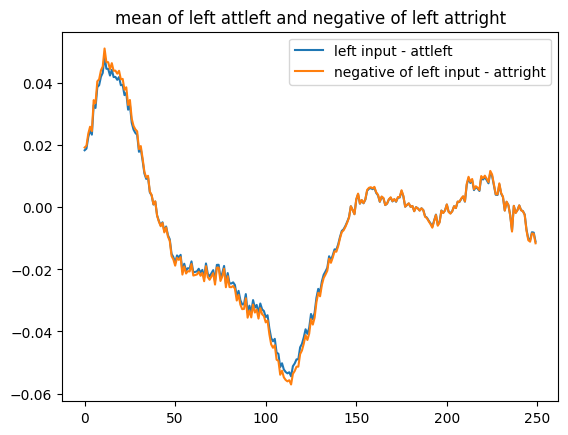

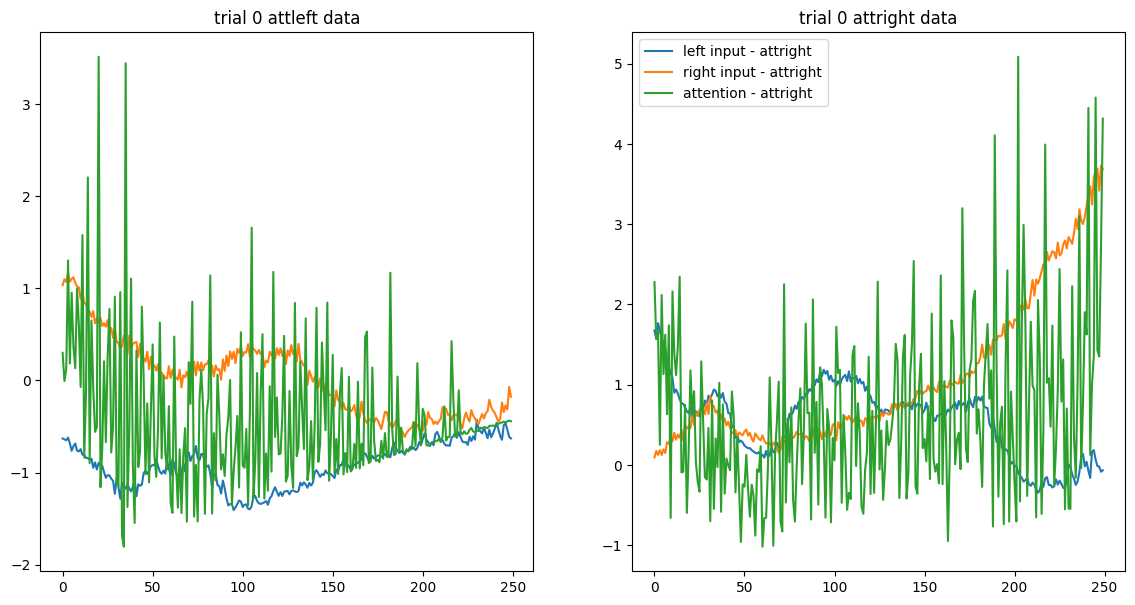

NaNs in left_attleft_coherence: False


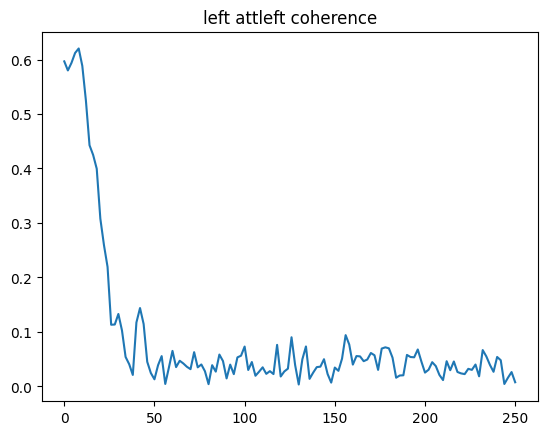

Dataset 8 complete in 9.701938390731812
Dataset 14 loaded in 5.04 seconds
non constant column at  (array([0]),)
non constant column at  (array([0]),)
non constant column at  (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),)


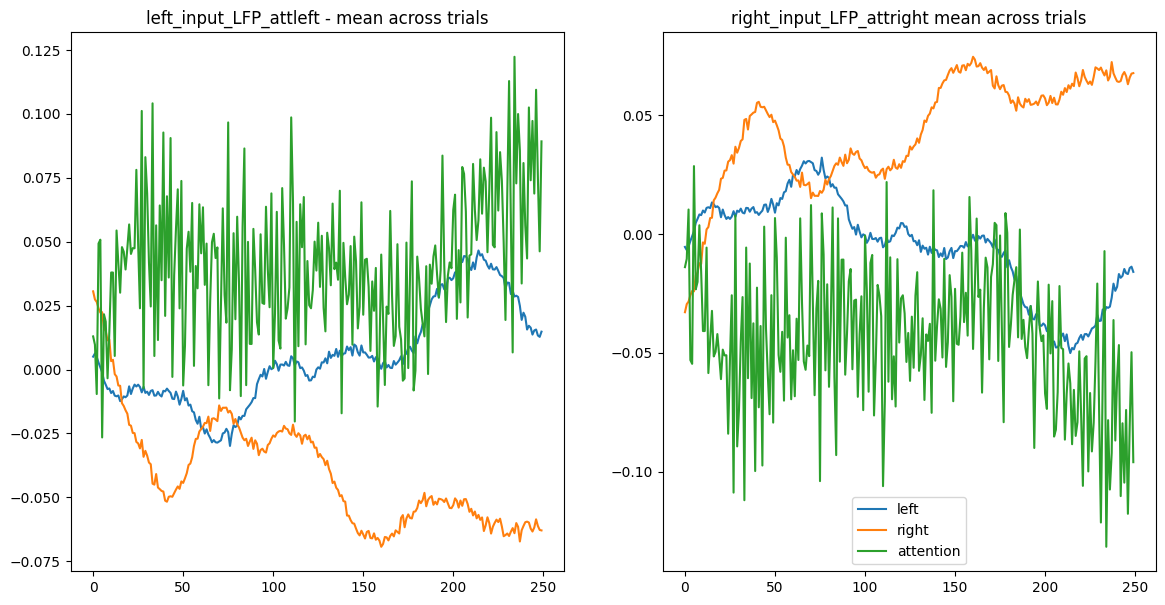

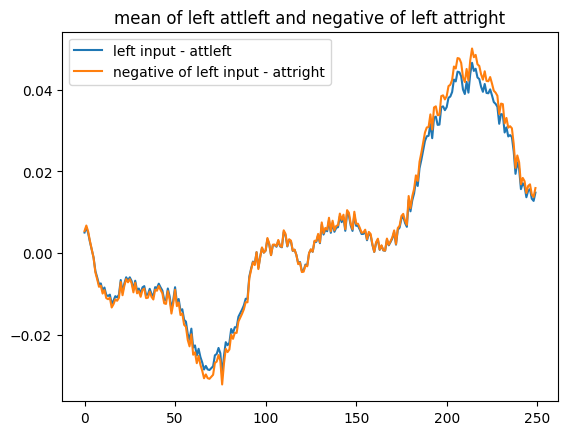

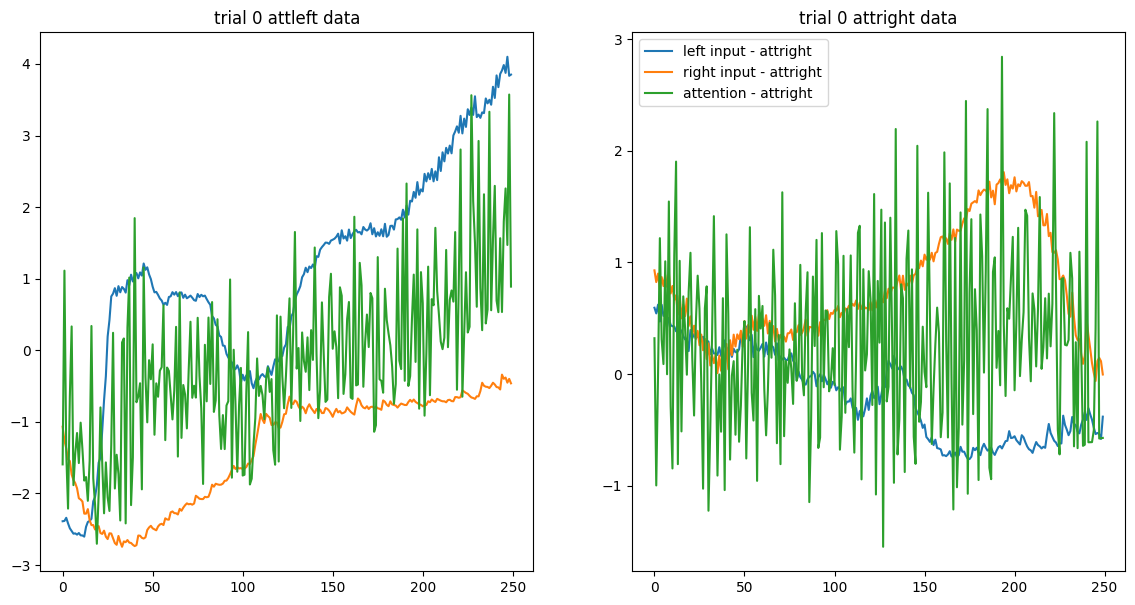

NaNs in left_attleft_coherence: False


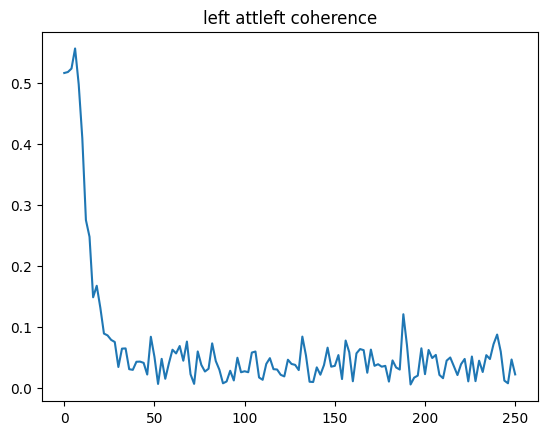

Dataset 14 complete in 6.74760365486145
Dataset 15 loaded in 5.42 seconds
non constant column at  (array([0]),)
non constant column at  (array([0]),)
non constant column at  (array([0, 1, 2, 3, 4, 5, 6, 7, 8]),)


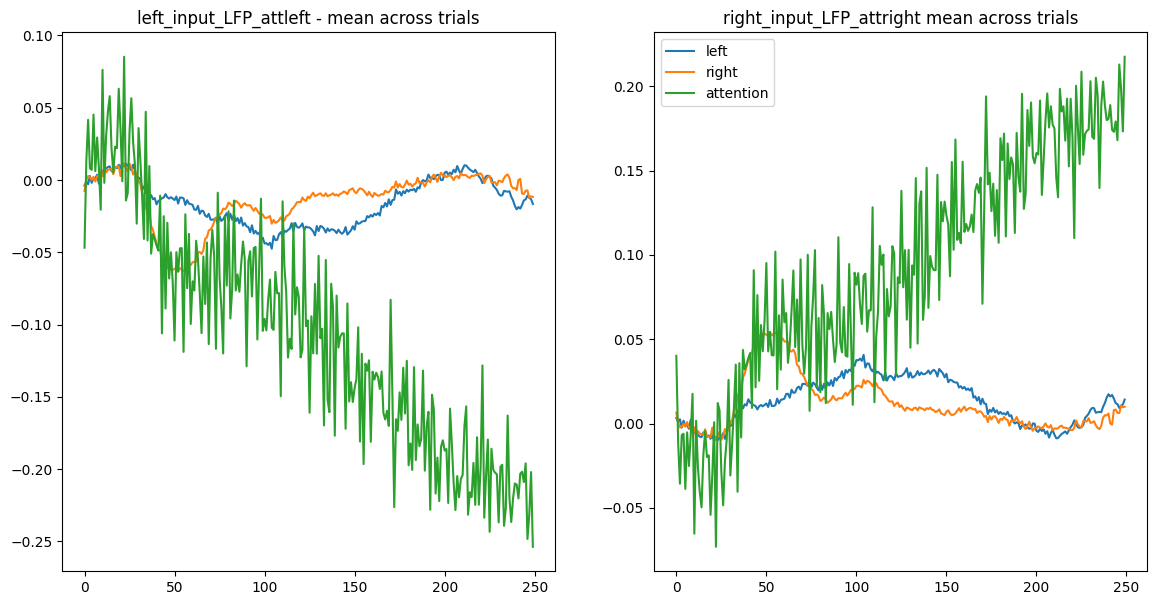

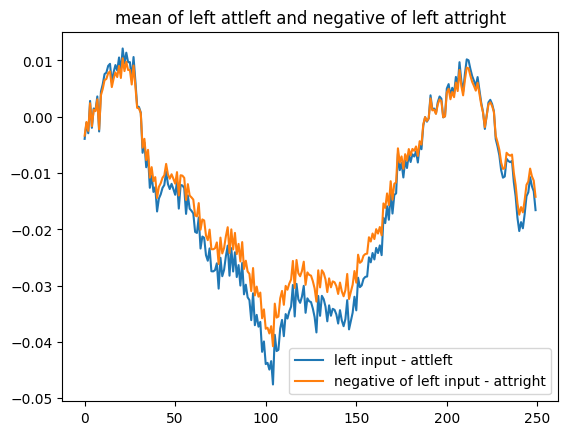

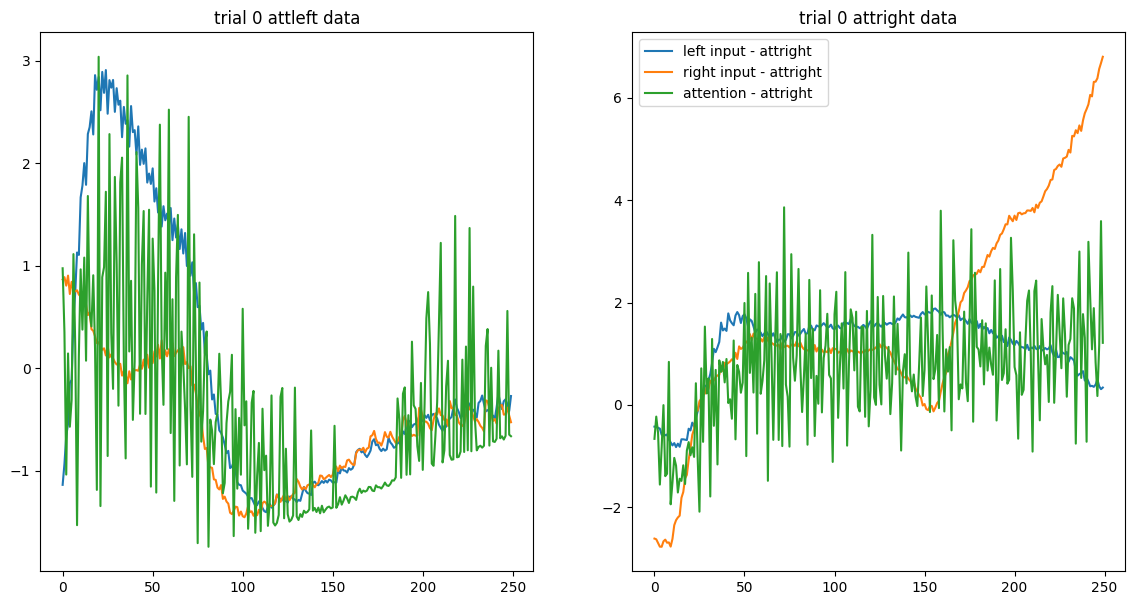

NaNs in left_attleft_coherence: False


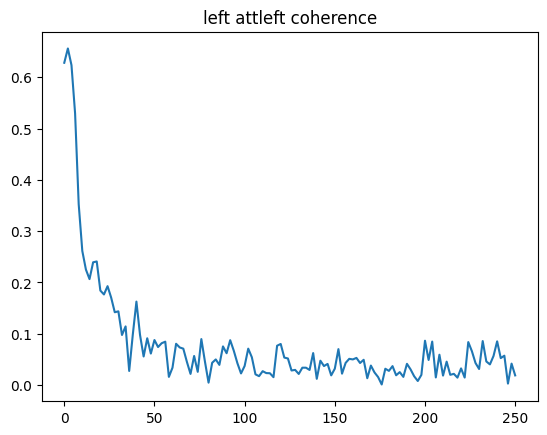

Dataset 15 complete in 7.224299430847168
Dataset 20 loaded in 6.18 seconds
non constant column at  (array([0]),)
non constant column at  (array([0]),)
non constant column at  (array([0, 1, 2, 3, 4, 5, 6, 7, 8]),)


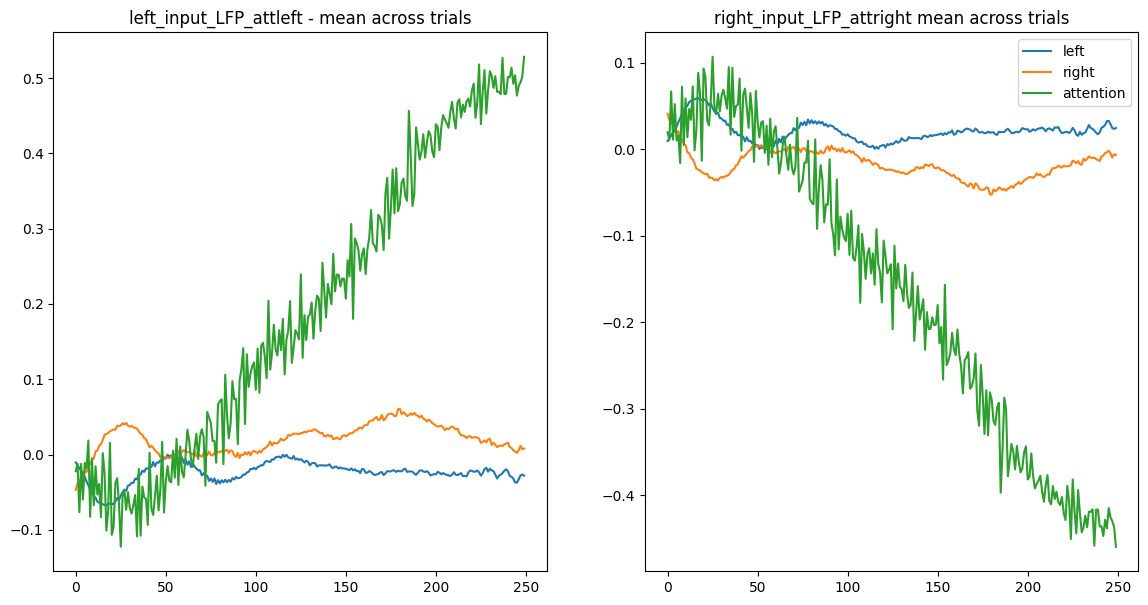

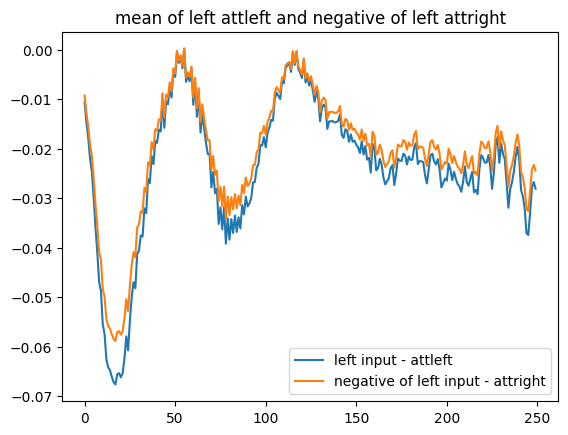

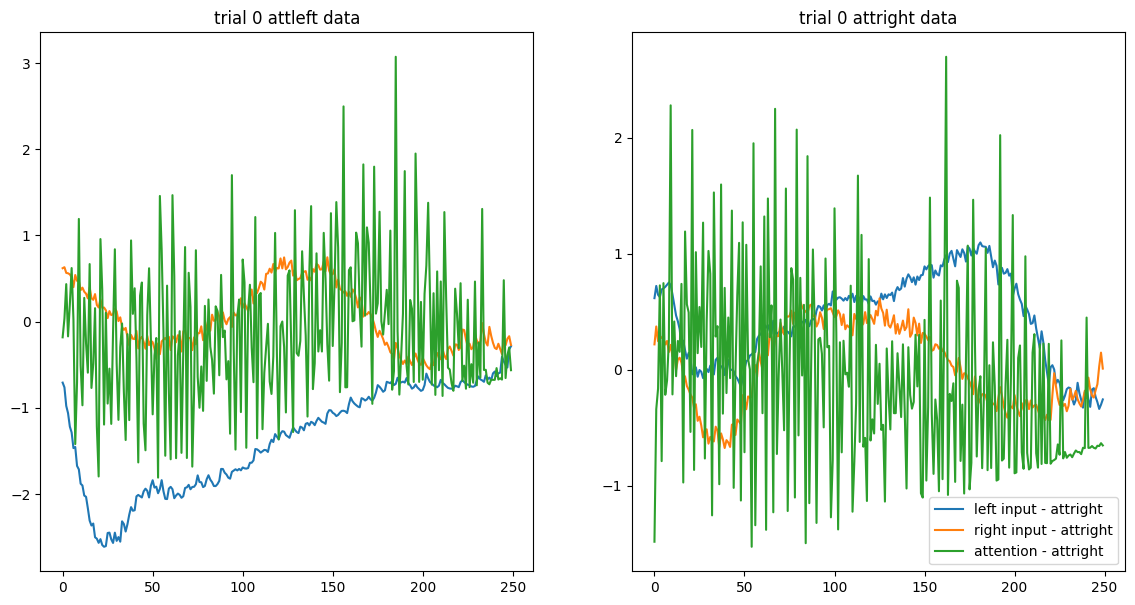

NaNs in left_attleft_coherence: False


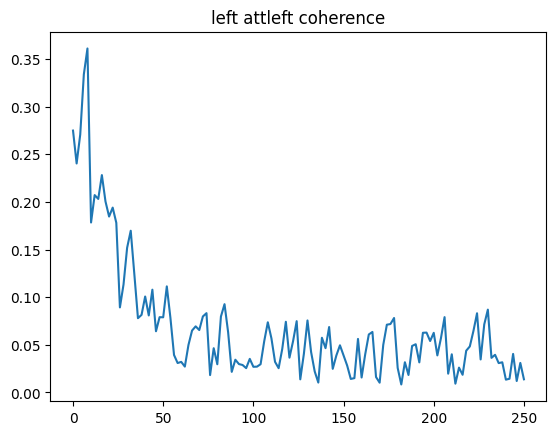

Dataset 20 complete in 9.01832365989685
Dataset 23 loaded in 5.57 seconds
non constant column at  (array([0]),)
non constant column at  (array([0]),)
non constant column at  (array([0, 1, 2, 3, 4, 5, 6, 7]),)


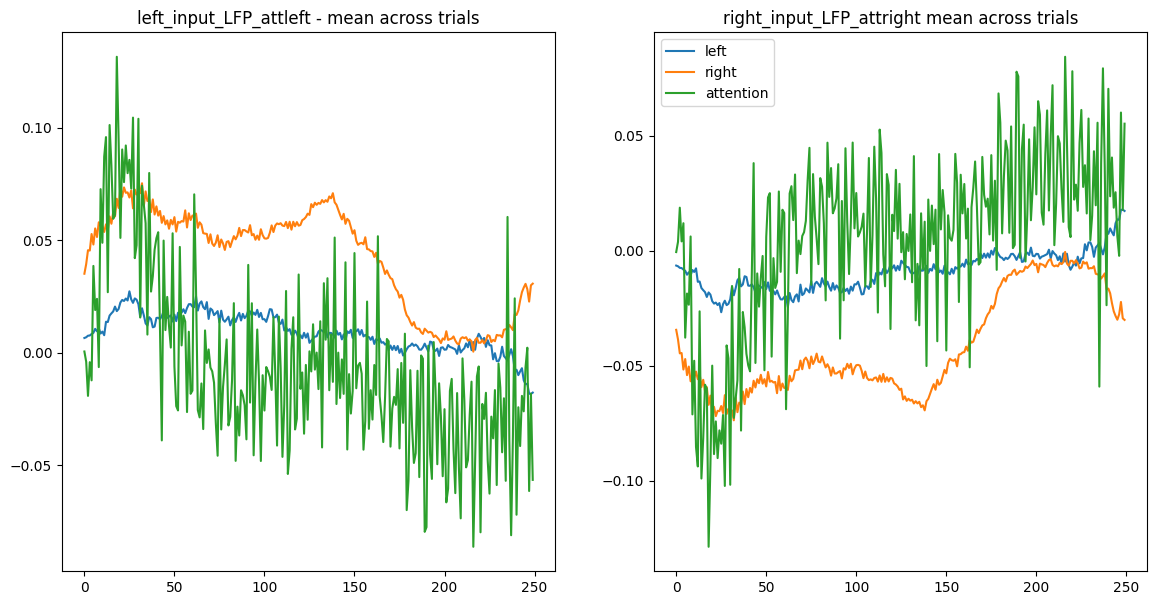

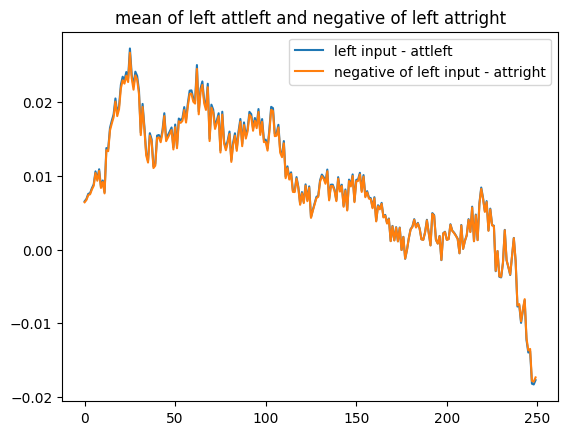

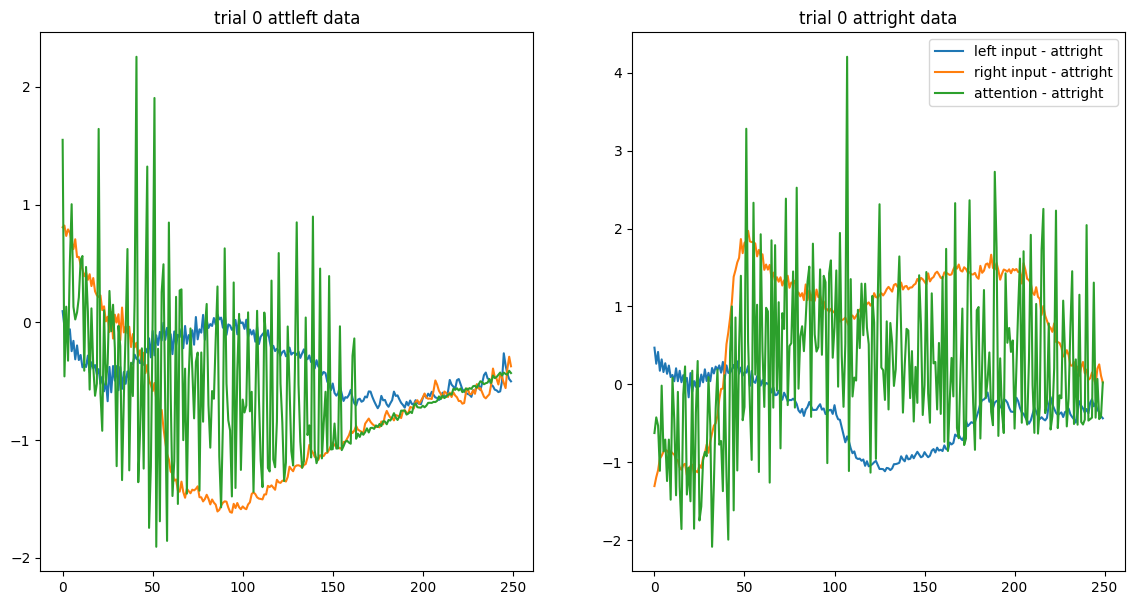

NaNs in left_attleft_coherence: False


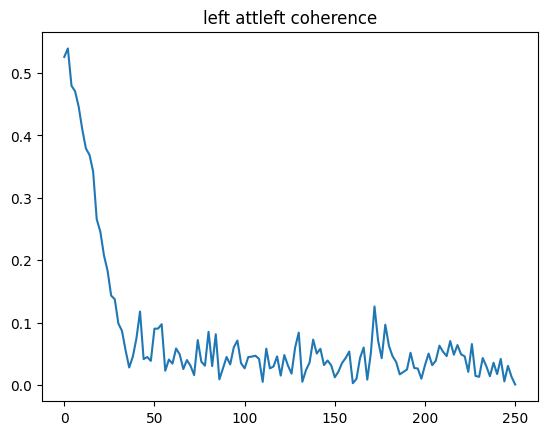

Dataset 23 complete in 8.332659482955933
total time elapsed = 77.13349652290344
{'dataset_1': {'delta': {'left_attleft': np.float64(1.2346145239952762), 'right_attleft': np.float64(1.1969863726721703), 'left_attright': np.float64(1.1151120189487163), 'right_attright': np.float64(1.150869854311937)}, 'theta': {'left_attleft': np.float64(1.1965154524191473), 'right_attleft': np.float64(1.0611818418108796), 'left_attright': np.float64(0.97562939837187), 'right_attright': np.float64(1.0623989973009484)}, 'alpha': {'left_attleft': np.float64(1.7325992976588136), 'right_attleft': np.float64(1.9534517053165517), 'left_attright': np.float64(1.5765977892145195), 'right_attright': np.float64(2.3183903406096564)}, 'beta': {'left_attleft': np.float64(3.044446936481064), 'right_attleft': np.float64(4.770968905586665), 'left_attright': np.float64(3.0178069221915664), 'right_attright': np.float64(4.617540134356789)}, 'gamma': {'left_attleft': np.float64(3.341909676124051), 'right_attleft': np.float64

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import time
import gc
from scipy.stats import zscore
from scipy.signal import detrend
import copy
import sys
from scipy.integrate import simpson as simps

coherence_path = r"C:\Users\joshu\nice\testcodepearsoncoherence"
sys.path.append(coherence_path)
import coherence  
from coherence import field_field_coherence


from scipy.ndimage import gaussian_filter1d

def smooth_with_gaussian(data, sigma=3):
    return gaussian_filter1d(data, sigma=sigma, axis=1) 
sigma = 2

def preprocess(data):
    stds = np.std(data[:, :], axis=0)
    non_constant_cols = stds > 1e-6
    if len(non_constant_cols) != 0:
        print('non constant column at ', np.where(non_constant_cols == False))
              
   
    constant_cols = stds < 1e-6

    z = np.zeros_like(data[:, :])
    z[:, non_constant_cols] = zscore(data[:, non_constant_cols], axis=0)
    z[:, constant_cols] = np.mean(data[:, constant_cols], axis = 0)

    #unsure what to replace lost values with, for now replacing with 0

    if np.isnan(z).any():
        raise ValueError("Data contains NaN values after normalization.")

    return z

# def preprocess(data):
#     data = detrend(data, axis=0)
#     epsilon = 1e-9
#     data = (data - np.mean(data, axis=0)) / (np.std(data, axis=0) + epsilon)
    
#     return data


#making the data structures
file_numbers = [1, 2, 4, 8, 14, 15, 20, 23]


dt = 0.002
bands = ['delta', 'theta', 'alpha', 'beta', 'gamma']   #for coherence I have looked at the mean valuee for these bands
freq_ranges = [(0, 4), (4, 8), (8, 13), (13, 30), (30, 80)]  #freq ranges

structure = {f'dataset_{file_number}': {f'{band}': {
    'left_attleft': [],
    'right_attleft': [],
    'left_attright': [],
    'right_attright': []
} for band in bands} for file_number in file_numbers} 

coherence_results = copy.deepcopy(structure)
coherence_results_means = copy.deepcopy(structure)

total_time = time.time()
for file_number in  file_numbers:
    file_total = time.time()
    file_path = f'C:/Users/joshu/PartIIIProject/RSNNdale_attention_{file_number}_attention_test'
    load_data_start_time = time.time()
    data = pickle.load(open(file_path, 'rb'))
    elapsed_time = time.time() - load_data_start_time
    print(f"Dataset {file_number} loaded in {elapsed_time:.2f} seconds")

    attention_labels = data['label_attend'][0]
    label_left = data['label_left'][0]
    label_right = data['label_right'][0]
    attend_01 = data['attend'][0]
    omitted = data["omit"][0]
    relevant = np.where(omitted == 0)[0]    #indices of agg where not omitted
    # print('relevant shape', relevant.shape)
    # print('relevant', relevant[0:15])

    # print(data['LFP'][0][0].shape)
    # print('non 0 in left first time points', np.where(data['LFP'][0][0][:, 0] != 0))  #this should print the first time point of the first trial of the left LFP

    left_input_LFP = preprocess(data['LFP'][0][0][relevant, :])
    right_input_LFP = preprocess(data['LFP'][0][1][relevant, :])
    attention_LFP = preprocess(data['LFP_rec'][0][2][relevant, :])

    left_indices_agg = np.where((omitted == 0) & (attend_01 == 0))[0]  #indices of agg where left
    # print('left indices agg shape', left_indices_agg.shape)
    # print('left indices agg', left_indices_agg[0:15])  
    _, left_indices, _ = np.intersect1d(relevant, left_indices_agg, return_indices = True)  #indices for relevant processed data where attention left
    # print('left indices shape', left_indices.shape)
    # print('left indices', left_indices[0:15])
    right_indices_agg = np.where((omitted ==0) & (attend_01 == 1))[0]
    _, right_indices, _ = np.intersect1d(relevant, right_indices_agg, return_indices = True)

    # print(left_indices[0:10])
    # print(right_indices[0:10])
     
    #print(f' found data for left {class_left}, right {class_right}')
    left_input_LFP_attleft = left_input_LFP[left_indices, 100:350]   #data for attention left
    right_input_LFP_attleft = right_input_LFP[left_indices, 100:350]
    attention_LFP_attleft = attention_LFP[left_indices, 100:350]

    left_input_LFP_attright = left_input_LFP[right_indices, 100:350]   #data for attention right
    right_input_LFP_attright = right_input_LFP[right_indices, 100:350]
    attention_LFP_attright = attention_LFP[right_indices, 100:350]

    #plotting some traces-----------
    fig, ax = plt.subplots(1, 2, figsize=(14, 7))
    ax[0].plot(np.mean(left_input_LFP_attleft[:, :], axis = 0), label = 'left')
    ax[0].plot(np.mean(right_input_LFP_attleft[:, :], axis = 0), label = 'right')
    ax[0].plot(np.mean(attention_LFP_attleft, axis = 0), label = 'attention')
    ax[0].set_title('left_input_LFP_attleft - mean across trials')
    ax[1].plot(np.mean(left_input_LFP_attright[:, :], axis = 0), label = 'left')
    ax[1].plot(np.mean(right_input_LFP_attright[:, :], axis = 0), label = 'right')
    ax[1].plot(np.mean(attention_LFP_attright, axis = 0), label = 'attention')
    ax[1].set_title('right_input_LFP_attright mean across trials')
    plt.legend()
    plt.show()

    plt.plot(np.mean(left_input_LFP_attleft[:, :], axis = 0), label = 'left input - attleft')
    plt.plot(-1 * np.mean(left_input_LFP_attright[:, :], axis = 0), label = 'negative of left input - attright')
    plt.title('mean of left attleft and negative of left attright')
    plt.legend()
    plt.show()

    fig, ax = plt.subplots(1, 2, figsize=(14, 7))
    ax[0].plot(left_input_LFP_attleft[0, :], label = 'left input - attleft')
    ax[0].plot(right_input_LFP_attleft[0, :], label = 'right input - attleft')
    ax[0].plot(attention_LFP_attleft[0, :], label = 'attention - attleft')
    ax[0].set_title('trial 0 attleft data')
    ax[1].plot(left_input_LFP_attright[0, :], label = 'left input - attright')
    ax[1].plot(right_input_LFP_attright[0, :], label = 'right input - attright')
    ax[1].plot(attention_LFP_attright[0, :], label = 'attention - attright')
    ax[1].set_title('trial 0 attright data')
    plt.legend()
    plt.show()

    #----------------calculating coherence --------------------------------
    left_attleft_coherence, freq = field_field_coherence(
        left_input_LFP_attleft, attention_LFP_attleft, dt)
    right_attleft_coherence, freq = field_field_coherence(
        right_input_LFP_attleft, attention_LFP_attleft, dt)
    left_attright_coherence, freq = field_field_coherence(
        left_input_LFP_attright, attention_LFP_attright, dt)
    right_attright_coherence, freq = field_field_coherence(
        right_input_LFP_attright, attention_LFP_attright, dt)
    
    print("NaNs in left_attleft_coherence:", np.isnan(left_attleft_coherence).any())

    
    plt.plot(freq, left_attleft_coherence, label = 'left attleft')
    plt.title('left attleft coherence')
    plt.show()


    for band, (f_min, f_max) in zip(bands, freq_ranges):
        band_idx = (freq >= f_min) & (freq < f_max)
        coherence_results[f'dataset_{file_number}'][band]['left_attleft'] = simps(left_attleft_coherence[band_idx], freq[band_idx])
        coherence_results[f'dataset_{file_number}'][band]['right_attleft'] = simps(right_attleft_coherence[band_idx], freq[band_idx])
        coherence_results[f'dataset_{file_number}'][band]['left_attright'] = simps(left_attright_coherence[band_idx], freq[band_idx])
        coherence_results[f'dataset_{file_number}'][band]['right_attright'] = simps(right_attright_coherence[band_idx], freq[band_idx])

    for band, (f_min, f_max) in zip(bands, freq_ranges):
        band_idx = (freq >= f_min) & (freq < f_max)
        coherence_results_means[f'dataset_{file_number}'][band]['left_attleft'] = np.mean(left_attleft_coherence[band_idx])
        coherence_results_means[f'dataset_{file_number}'][band]['right_attleft'] = np.mean(right_attleft_coherence[band_idx])
        coherence_results_means[f'dataset_{file_number}'][band]['left_attright'] = np.mean(left_attright_coherence[band_idx])
        coherence_results_means[f'dataset_{file_number}'][band]['right_attright'] = np.mean(right_attright_coherence[band_idx])


    del left_input_LFP_attleft, right_input_LFP_attleft, attention_LFP_attleft, left_input_LFP_attright, right_input_LFP_attright, attention_LFP_attright
    gc.collect()
    del(data)
    gc.collect()
    print(f'Dataset {file_number} complete in', time.time() - file_total)

print('total time elapsed =', time.time() - total_time)
print(coherence_results)


[np.float64(1.1927421891536065), np.float64(1.1560491958104433), np.float64(1.3153612235575536), np.float64(1.1404809958014237), np.float64(1.2358338594668827), np.float64(1.3726429918389678), np.float64(1.017443268187481), np.float64(1.1370531858728146), np.float64(1.20132121855822), np.float64(1.2914966908934855), np.float64(0.8342254444613377), np.float64(1.2671563834433472), np.float64(0.8635612922784849), np.float64(1.1436110369244272), np.float64(1.2703058744397118), np.float64(1.2153782844571428)]
[np.float64(1.1610997070068272), np.float64(1.087227407950909), np.float64(1.3049823652513062), np.float64(1.066347582830537), np.float64(1.2522795840560106), np.float64(1.3064651980356388), np.float64(1.0416668124597108), np.float64(1.063078399103059), np.float64(1.1627893437886225), np.float64(1.2478294171691866), np.float64(0.7631860603553833), np.float64(1.1243569658309172), np.float64(0.8681023945950365), np.float64(1.0909196637459542), np.float64(1.195483525795653), np.float64(1.

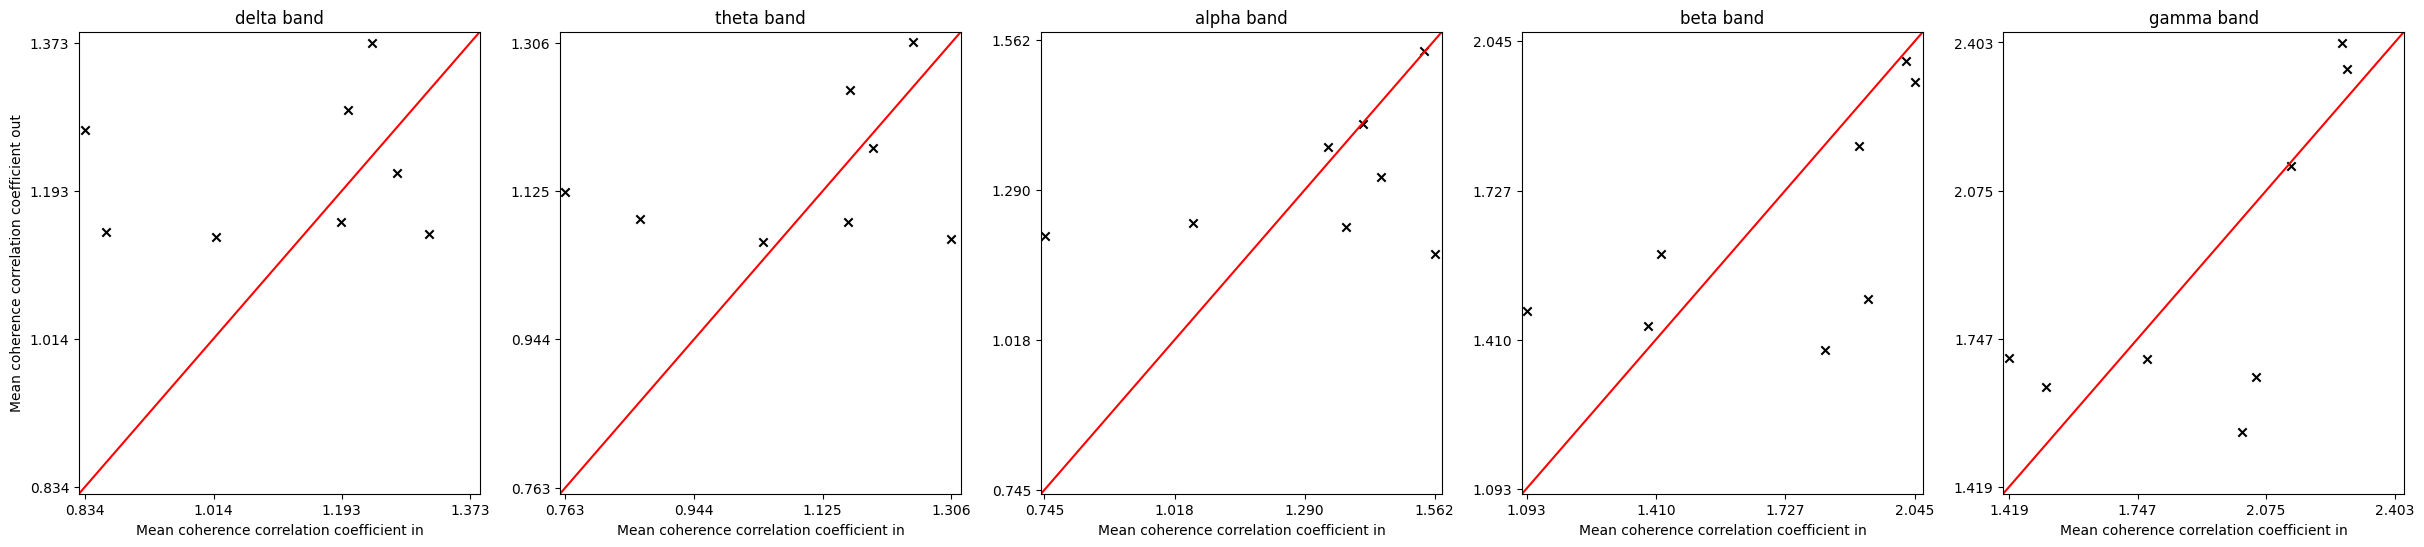

In [29]:
#want a single plot, where for each dataset, mean coherence in and mean coherence out are plotted with error bars
coherence_in = {f'{band}': [] for band in bands}
coherence_out = {f'{band}': [] for band in bands}


for file_number in file_numbers:
    values = []
    errors = []
    for band in bands:
        for condition in ['left_attleft', 'right_attright']:
            values.append(coherence_results[f'dataset_{file_number}'][band][condition])
        coherence_in[f'{band}'].append(np.mean(values))



    values = []
    errors = []
    for band in bands:
        for condition in ['left_attright', 'right_attleft']:
            values.append(coherence_results[f'dataset_{file_number}'][band][condition])
        coherence_out[f'{band}'].append(np.mean(values))
    
max_values = {f'{band}': [] for band in bands}
min_values = {f'{band}': [] for band in bands}

idx = np.arange(len(file_numbers))
for band in bands:
    values = []
    for f in idx:
        values.append(coherence_in[f'{band}'][f])
        values.append(coherence_out[f'{band}'][f])
    print(values)
    max_values[f'{band}'].append(max(values))
    min_values[f'{band}'].append(min(values))

print(max_values)

fig, axs = plt.subplots(1,5, figsize=(30, 6))
for i, band in enumerate(bands):
    axs[i].scatter(coherence_in[f'{band}'], coherence_out[f'{band}'], marker='x', color='k')
    axs[i].plot([0, 1], [0, 1], transform=axs[i].transAxes, color='r')
    axs[i].set_xlim(min_values[f'{band}'][0]*(0.99), max_values[f'{band}'][0]*(1.01))
    axs[i].set_ylim(min_values[f'{band}'][0]*(0.99), max_values[f'{band}'][0]*(1.01))
    axs[i].set_xticks(np.round(np.linspace(min_values[f'{band}'][0],max_values[f'{band}'][0], 4), 3))
    axs[i].set_yticks(np.round(np.linspace(min_values[f'{band}'][0],max_values[f'{band}'][0], 4), 3))
    axs[i].set_xlabel('Mean coherence correlation coefficient in')
    axs[0].set_ylabel('Mean coherence correlation coefficient out')
    axs[i].set_title(f'{band} band')
plt.show()


[np.float64(0.5963710945768033), np.float64(0.5780245979052216), np.float64(0.6576806117787768), np.float64(0.5702404979007119), np.float64(0.6179169297334414), np.float64(0.6863214959194839), np.float64(0.5087216340937405), np.float64(0.5685265929364073), np.float64(0.60066060927911), np.float64(0.6457483454467428), np.float64(0.41711272223066886), np.float64(0.6335781917216736), np.float64(0.43178064613924244), np.float64(0.5718055184622136), np.float64(0.6351529372198559), np.float64(0.6076891422285714)]
[np.float64(0.5805498535034136), np.float64(0.5436137039754545), np.float64(0.6524911826256531), np.float64(0.5331737914152685), np.float64(0.6261397920280053), np.float64(0.6532325990178194), np.float64(0.5208334062298554), np.float64(0.5315391995515295), np.float64(0.5813946718943113), np.float64(0.6239147085845933), np.float64(0.38159303017769164), np.float64(0.5621784829154586), np.float64(0.43405119729751823), np.float64(0.5454598318729771), np.float64(0.5977417628978265), np.f

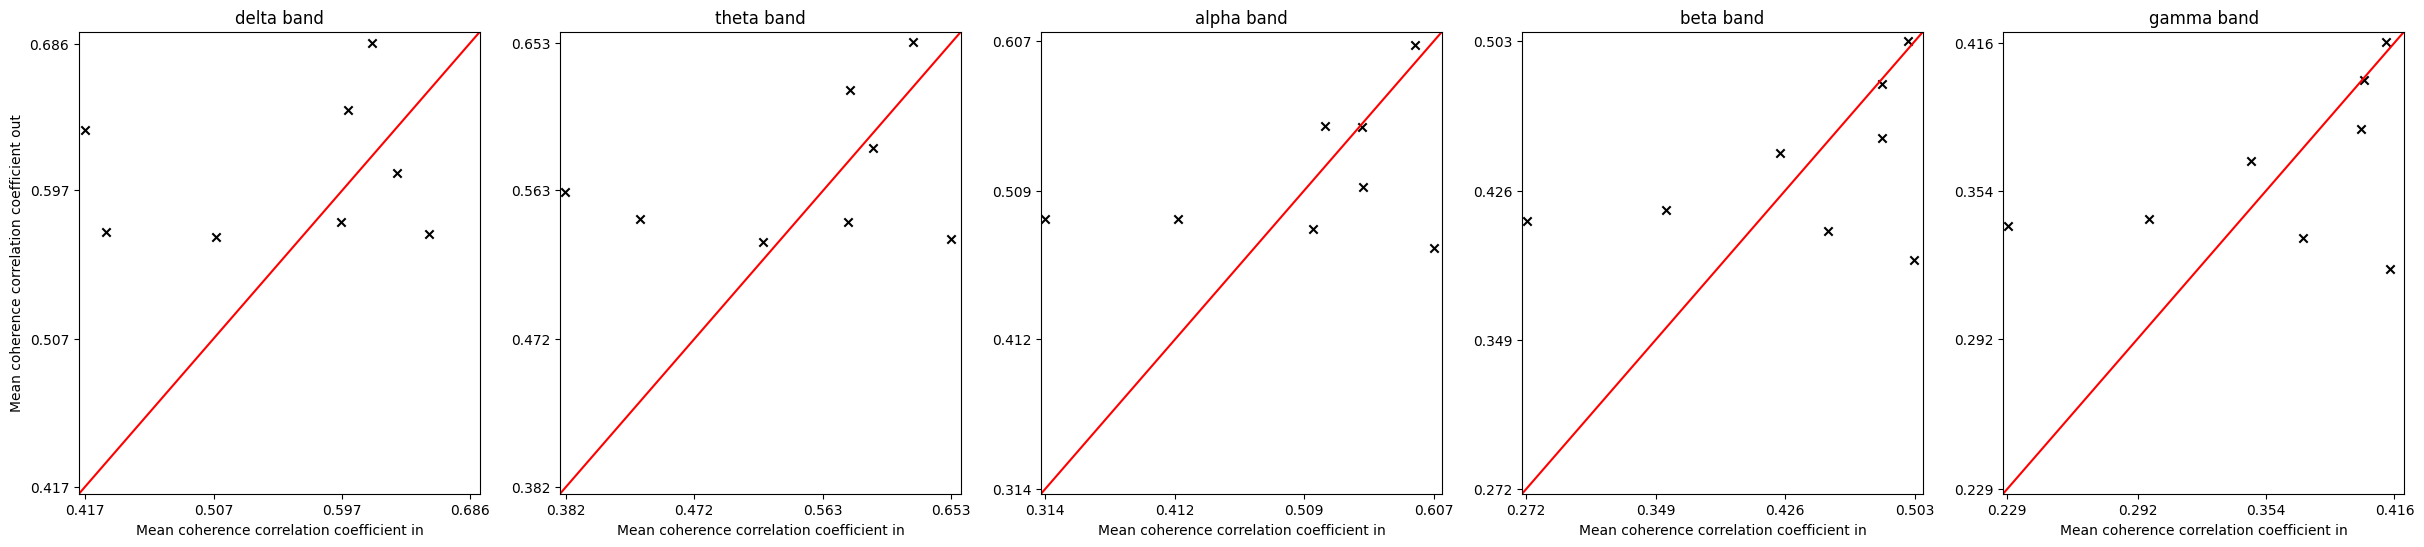

In [30]:
#want a single plot, where for each dataset, mean coherence in and mean coherence out are plotted with error bars
coherence_in = {f'{band}': [] for band in bands}
coherence_out = {f'{band}': [] for band in bands}


for file_number in file_numbers:
    values = []
    errors = []
    for band in bands:
        for condition in ['left_attleft', 'right_attright']:
            values.append(coherence_results_means[f'dataset_{file_number}'][band][condition])
        coherence_in[f'{band}'].append(np.mean(values))



    values = []
    errors = []
    for band in bands:
        for condition in ['left_attright', 'right_attleft']:
            values.append(coherence_results_means[f'dataset_{file_number}'][band][condition])
        coherence_out[f'{band}'].append(np.mean(values))
    
max_values = {f'{band}': [] for band in bands}
min_values = {f'{band}': [] for band in bands}

idx = np.arange(len(file_numbers))
for band in bands:
    values = []
    for f in idx:
        values.append(coherence_in[f'{band}'][f])
        values.append(coherence_out[f'{band}'][f])
    print(values)
    max_values[f'{band}'].append(max(values))
    min_values[f'{band}'].append(min(values))

print(max_values)

fig, axs = plt.subplots(1,5, figsize=(30, 6))
for i, band in enumerate(bands):
    axs[i].scatter(coherence_in[f'{band}'], coherence_out[f'{band}'], marker='x', color='k')
    axs[i].plot([0, 1], [0, 1], transform=axs[i].transAxes, color='r')
    axs[i].set_xlim(min_values[f'{band}'][0]*(0.99), max_values[f'{band}'][0]*(1.01))
    axs[i].set_ylim(min_values[f'{band}'][0]*(0.99), max_values[f'{band}'][0]*(1.01))
    axs[i].set_xticks(np.round(np.linspace(min_values[f'{band}'][0],max_values[f'{band}'][0], 4), 3))
    axs[i].set_yticks(np.round(np.linspace(min_values[f'{band}'][0],max_values[f'{band}'][0], 4), 3))
    axs[i].set_xlabel('Mean coherence correlation coefficient in')
    axs[0].set_ylabel('Mean coherence correlation coefficient out')
    axs[i].set_title(f'{band} band')
plt.show()
